Frequency Response of Helmoltz Coils

In [2]:
import math as math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
def field_to_current(field, coil, current_to_field_ratio):
    return (1/current_to_field_ratio[coil])*field

def f_to_w(f):
    return 2*math.pi*f

def voltage_frequency_response(R,L,w,I):
    return math.sqrt(R**2 + (L*w)**2)*I

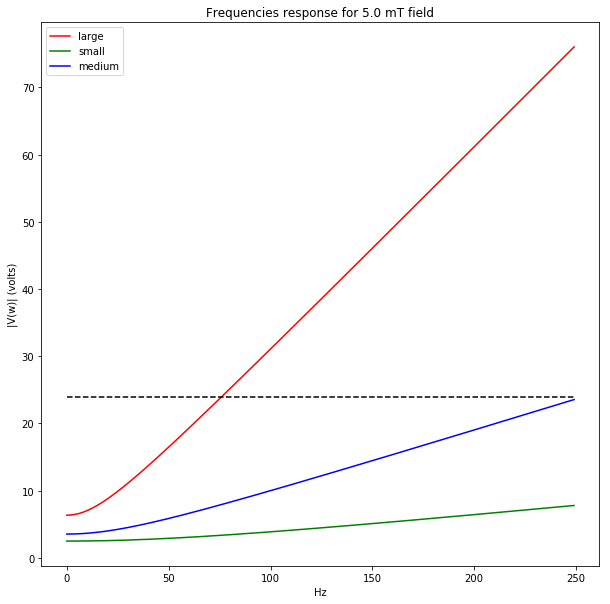

In [6]:
# Velocity control with gravity compensation for magnetic helical microswimmers (2011)
R = {'small':0.5, 'medium':0.9,'large':1.6} # Ohms (small, medium, large coils)
L = {'small':0.944/1000,'medium':3.78/1000,'large':12.2/1000} # H (small, medium, large coils)
current_to_field_ratio = {'small':1, 'medium':1.27, 'large':1.26} # ratio of coil current (A) to field magnitude (mT)
coils = {'small','medium','large'}

b = 5 # mT
frequencies = range(0,250) # Hz
V = np.zeros((len(coils),len(frequencies)))
for i, coil in enumerate(coils):
    for f in frequencies:
        w = f_to_w(f)
        I = field_to_current(b,coil,current_to_field_ratio)
        V[i,f] = voltage_frequency_response(R[coil],L[coil],w,I)
        
# plot
plt.figure(figsize=(10,10))
plt.plot(frequencies,V[0,:],'r')
plt.plot(frequencies,V[1,:],'g')
plt.plot(frequencies,V[2,:],'b')

plt.plot(frequencies,24*np.ones(len(frequencies)),'k--') # Advanced Motion Control PS4X3W24

plt.xlabel('Hz')
plt.ylabel('|V(w)| (volts)')
plt.title('Frequencies response for %.1f mT field' % b)
plt.legend(coils)